In [ ]:
1from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
pip install -U assemblyai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/63.6 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.9 MB/s eta 0:00:00


#Text files-Text

In [ ]:
# Start by making sure the `assemblyai` package is installed.
# If not, you can install it by running the following command:
# pip install -U assemblyai
#
# Note: Some macOS users may need to use `pip3` instead of `pip`.

import assemblyai as aai

# Replace with your API token
aai.settings.api_key = f"e1828623714b432bbe6230c4b67b9cdc"

# URL of the file to transcribe
#FILE_URL = "https://github.com/AssemblyAI-Examples/audio-examples/raw/main/20230607_me_canadian_wildfires.mp3"

# You can also transcribe a local file by passing in a file path
FILE_URL = '/content/drive/MyDrive/datasets/my product is very g.wav'

transcriber = aai.Transcriber()
transcript = transcriber.transcribe(FILE_URL)

print(transcript.text)

My product is very good and I am satisfied.


#Logistic Regression-85%

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/datasets/amazonreviews.csv')

# Data preprocessing
def preprocess_text(text):
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize the text
    words = word_tokenize(text)
    # Remove stop words
    words = [word for word in words if word not in set(stopwords.words('english'))]
    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    # Join the words back into a single string
    return ' '.join(words)

data['review'] = data['review'].apply(preprocess_text)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['review'], data['label'], test_size=0.2, random_state=42)

# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize and train the Logistic Regression classifier
clf = LogisticRegression()
clf.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = clf.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print a classification report
print(classification_report(y_test, y_pred))

# Make predictions on custom input
custom_input = ["This movie was great! I loved it.", "I didn't like this book at all."]

# Preprocess the custom input
custom_input_tfidf = tfidf_vectorizer.transform(custom_input)

# Make predictions
custom_predictions = clf.predict(custom_input_tfidf)

# Print the custom input and predictions

for text, prediction in zip(custom_input, custom_predictions):
    sentiment = "positive" if prediction == 'pos' else "negative"
    print(f"Input: {text}\nPredicted Sentiment: {sentiment}\n")


Accuracy: 0.85
              precision    recall  f1-score   support

         neg       0.85      0.86      0.85      1037
         pos       0.85      0.84      0.84       963

    accuracy                           0.85      2000
   macro avg       0.85      0.85      0.85      2000
weighted avg       0.85      0.85      0.85      2000

Input: This movie was great! I loved it.
Predicted Sentiment: positive

Input: I didn't like this book at all.
Predicted Sentiment: negative



#Naive Bayes-82.7%

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/datasets/amazonreviews.csv')

# Data preprocessing
def preprocess_text(text):
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize the text
    words = word_tokenize(text)
    # Remove stop words
    words = [word for word in words if word not in set(stopwords.words('english'))]
    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    # Join the words back into a single string
    return ' '.join(words)

data['review'] = data['review'].apply(preprocess_text)
#In this code, we perform the following data preprocessing steps:

#Remove special characters and numbers.
#Convert the text to lowercase.
#Tokenize the text.
#Remove stop words using NLTK's stopwords.
#Lemmatize words to their base form.
#Join the words back into a single string.

print("the preprocessed data is ::")
print(data['review'])
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['review'], data['label'], test_size=0.2, random_state=42)

# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize and train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

# Make predictions
nb_predictions = nb_classifier.predict(X_test_tfidf)

# Evaluate the model
nb_accuracy = accuracy_score(y_test, nb_predictions)
print("Naive Bayes Accuracy:", nb_accuracy)
print(classification_report(y_test, nb_predictions))

# Test with custom input for Naive Bayes
custom_input = ["This product was good the price was high", "I didn't like this book at all."]

# Preprocess the custom input
custom_input_tfidf = tfidf_vectorizer.transform(custom_input)

# Make predictions for custom input
custom_predictions = nb_classifier.predict(custom_input_tfidf)

# Print the custom input and predictions for Naive Bayes
for text, prediction in zip(custom_input, custom_predictions):
    sentiment = "positive" if prediction == 'pos' else "negative"
    print(f"Input: {text}\nNaive Bayes Predicted Sentiment: {sentiment}\n")


the preprocessed data is ::
0       stuning even non gamer sound track beautiful p...
1       best soundtrack ever anything reading lot revi...
2       amazing soundtrack favorite music time hand in...
3       excellent soundtrack truly like soundtrack enj...
4       remember pull jaw floor hearing played game kn...
                              ...                        
9995    revelation life small town america early thoug...
9996    great biography interesting journalist biograp...
9997    interesting subject poor presentation hard pre...
9998    buy box looked used obviously new tried contac...
9999    beautiful pen fast delivery pen shipped prompt...
Name: review, Length: 10000, dtype: object
Naive Bayes Accuracy: 0.827
              precision    recall  f1-score   support

         neg       0.82      0.85      0.84      1037
         pos       0.83      0.80      0.82       963

    accuracy                           0.83      2000
   macro avg       0.83      0.83      0.83  

#Support Vector Machine(SVM)-85%

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.svm import SVC

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/datasets/amazonreviews.csv')

# Data preprocessing
def preprocess_text(text):
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize the text
    words = word_tokenize(text)
    # Remove stop words
    words = [word for word in words if word not in set(stopwords.words('english'))]
    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    # Join the words back into a single string
    return ' '.join(words)

data['review'] = data['review'].apply(preprocess_text)
#In this code, we perform the following data preprocessing steps:

#Remove special characters and numbers.
#Convert the text to lowercase.
#Tokenize the text.
#Remove stop words using NLTK's stopwords.
#Lemmatize words to their base form.
#Join the words back into a single string.

print("the preprocessed data is ::")
print(data['review'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['review'], data['label'], test_size=0.2, random_state=42)

# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize and train the SVM classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_tfidf, y_train)

# Make predictions
svm_predictions = svm_classifier.predict(X_test_tfidf)

# Evaluate the model
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("SVM Accuracy:", svm_accuracy)
print(classification_report(y_test, svm_predictions))

# Test with custom input for SVM
custom_input = ["This movie was great", "I didn't like this book at all."]

# Preprocess the custom input
custom_input_tfidf = tfidf_vectorizer.transform(custom_input)

# Make predictions for custom input
custom_predictions = svm_classifier.predict(custom_input_tfidf)

# Print the custom input and predictions for SVM
for text, prediction in zip(custom_input, custom_predictions):
    sentiment = "positive" if prediction == 'pos' else "negative"
    print(f"Input: {text}\nSVM Predicted Sentiment: {sentiment}\n")


the preprocessed data is ::
0       stuning even non gamer sound track beautiful p...
1       best soundtrack ever anything reading lot revi...
2       amazing soundtrack favorite music time hand in...
3       excellent soundtrack truly like soundtrack enj...
4       remember pull jaw floor hearing played game kn...
                              ...                        
9995    revelation life small town america early thoug...
9996    great biography interesting journalist biograp...
9997    interesting subject poor presentation hard pre...
9998    buy box looked used obviously new tried contac...
9999    beautiful pen fast delivery pen shipped prompt...
Name: review, Length: 10000, dtype: object
SVM Accuracy: 0.8525
              precision    recall  f1-score   support

         neg       0.86      0.85      0.86      1037
         pos       0.84      0.85      0.85       963

    accuracy                           0.85      2000
   macro avg       0.85      0.85      0.85      200

In [ ]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
import re

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/datasets/amazonreviews.csv')

# Select one sample from the dataset
sample_text = data['review'].iloc[0]

# Data preprocessing
def preprocess_text(text):
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    print("After removing special characters and numbers:", text)

    # Convert to lowercase
    text = text.lower()
    print("After converting to lowercase:", text)

    # Tokenize the text
    words = word_tokenize(text)
    print("After tokenization:", words)

    # Remove stop words
    words = [word for word in words if word not in set(stopwords.words('english'))]
    print("After removing stop words:", words)

    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    print("After lemmatization:", words)

    # Join the words back into a single string
    return ' '.join(words)

# Preprocess the selected sample
preprocessed_sample = preprocess_text(sample_text)
print("\nPreprocessed Text:")
print(preprocessed_sample)

# TF-IDF vectorization for the preprocessed sample
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
sample_tfidf = tfidf_vectorizer.fit_transform([preprocessed_sample])
print("\nTF-IDF Vectorization for the Preprocessed Sample:")
print(sample_tfidf.toarray())


After removing special characters and numbers: Stuning even for the non gamer  This sound track was beautiful  It paints the senery in your mind so well I would recomend it even to people who hate vid  game music  I have played the game Chrono Cross but out of all of the games I have ever played it has the best music  It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras  It would impress anyone who cares to listen     
After converting to lowercase: stuning even for the non gamer  this sound track was beautiful  it paints the senery in your mind so well i would recomend it even to people who hate vid  game music  i have played the game chrono cross but out of all of the games i have ever played it has the best music  it backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras  it would impress anyone who cares to listen     
After tokenization: ['stuning', 'even', 'for', 'the', 'non', 'gamer'

#LSTM-83.1%

Epoch 1/5
100/100 [==============================] - 35s 324ms/step - loss: 0.5795 - accuracy: 0.6828 - val_loss: 0.3826 - val_accuracy: 0.8388
Epoch 2/5
100/100 [==============================] - 29s 295ms/step - loss: 0.2687 - accuracy: 0.8959 - val_loss: 0.3729 - val_accuracy: 0.8388
Epoch 3/5
100/100 [==============================] - 32s 318ms/step - loss: 0.1521 - accuracy: 0.9478 - val_loss: 0.4473 - val_accuracy: 0.8381
Epoch 4/5
100/100 [==============================] - 30s 303ms/step - loss: 0.0864 - accuracy: 0.9733 - val_loss: 0.5355 - val_accuracy: 0.8388
Epoch 5/5
63/63 [==============================] - 4s 59ms/step


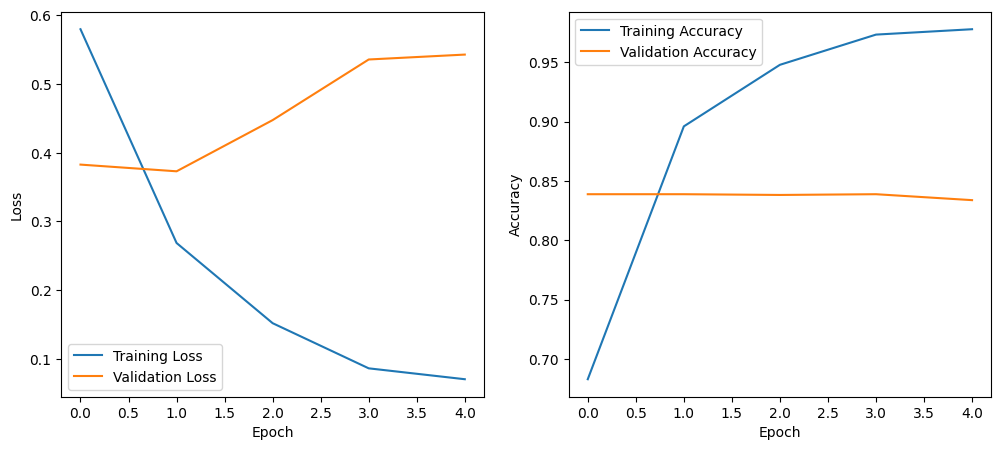

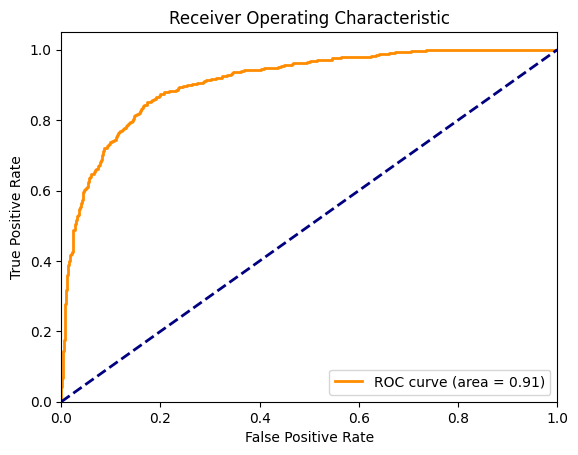

Classification Report:
              precision    recall  f1-score   support

    Negative       0.83      0.85      0.84      1037
    Positive       0.84      0.81      0.82       963

    accuracy                           0.83      2000
   macro avg       0.83      0.83      0.83      2000
weighted avg       0.83      0.83      0.83      2000

Test accuracy: 83.10%


In [ ]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, classification_report, accuracy_score
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv("/content/drive/MyDrive/datasets/amazonreviews.csv")

# Preprocess the data
max_words = 10000
max_sequence_length = 100

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data['review'])
sequences = tokenizer.texts_to_sequences(data['review'])
X = pad_sequences(sequences, maxlen=max_sequence_length)
Y = np.array([1 if label == 'pos' else 0 for label in data['label']])

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Build the LSTM model
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_sequence_length))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model and collect the training history
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=5, batch_size=64)

# Generate predictions
y_pred = model.predict(X_test)

# Calculate ROC curve
fpr, tpr, _ = roc_curve(Y_test, y_pred)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')

plt.show()

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Classification Report
threshold = 0.5  # You can adjust this threshold as needed
y_pred_binary = [1 if val > threshold else 0 for val in y_pred]
classification_rep = classification_report(Y_test, y_pred_binary, target_names=['Negative', 'Positive'])

print("Classification Report:")
print(classification_rep)

# Accuracy
accuracy = accuracy_score(Y_test, y_pred_binary)
print(f"Test accuracy: {accuracy * 100:.2f}%")


In [ ]:
# Save the model
model.save("sentiment_lstm_model.h5")

# Load the saved model
from keras.models import load_model
loaded_model = load_model("sentiment_lstm_model.h5")

# Prepare custom input
custom_input = ["This is a worst movie but songs are good!"]
custom_sequences = tokenizer.texts_to_sequences(custom_input)
custom_input_padded = pad_sequences(custom_sequences, maxlen=max_sequence_length)

# Predict sentiment
predictions = loaded_model.predict(custom_input_padded)

# Interpret the predictions
threshold = 0.5
sentiment = "Positive" if predictions > threshold else "Negative"

print("Sentiment Analysis Results:")
print(f"The sentiment of the custom input is: {sentiment}")




1/1 [==============================] - 1s 691ms/step
Sentiment Analysis Results:
The sentiment of the custom input is: Negative


#CNN-84.35%

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/datasets/amazonreviews.csv')

# Data preprocessing
# ... (same preprocessing as before)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['review'], data['label'], test_size=0.2, random_state=42)

# Encode labels
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Tokenize and pad sequences for CNN
max_words = 5000
max_len = 100
tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_len, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_len, padding='post', truncating='post')

# Build the CNN model
cnn_model = Sequential()
cnn_model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
cnn_model.add(Conv1D(128, 5, activation='relu'))
cnn_model.add(GlobalMaxPooling1D())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(1, activation='sigmoid'))

# Compile the model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
cnn_model.summary()

# Train the CNN model
cnn_model.fit(X_train_padded, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
cnn_predictions = (cnn_model.predict(X_test_padded).flatten() > 0.5).astype(int)
cnn_accuracy = accuracy_score(y_test, cnn_predictions)

# Print the accuracy and classification report
print("CNN Accuracy:", cnn_accuracy)
print(classification_report(y_test, cnn_predictions))


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 128)          640000    
                                                                 
 conv1d (Conv1D)             (None, 96, 128)           82048     
                                                                 
 global_max_pooling1d (Glob  (None, 128)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                        

#Pretrained Model-BERT-92%


In [ ]:
pip install transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 59.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 36.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 94.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 87.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 34.7 MB/s eta 0:00:00


In [ ]:
import torch
torch.cuda.is_available()

True

In [ ]:
# Install required libraries
!pip install datasets transformers huggingface_hub
!apt-get install git-lfs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.9 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git-lfs is already the newest version (3.0.2-1ubuntu0.2).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load your CSV file into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/datasets/amazonreviews.csv')


# Define the size of the smaller training and testing datasets
train_size = 9000  # Adjust the size as needed
test_size = 1000  # Adjust the size as needed

# Split the dataset into a smaller training and testing set
small_train_dataset, small_test_dataset = train_test_split(df, test_size=test_size, train_size=train_size, random_state=42)

# Convert the subsets into pandas DataFrames
small_train_dataframe = pd.DataFrame(data=small_train_dataset).replace({'pos': 1, 'neg': 0})
small_test_dataframe = pd.DataFrame(data=small_test_dataset).replace({'pos': 1, 'neg': 0})

In [ ]:
# Set DistilBERT tokenizer
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

In [ ]:
from datasets import Dataset

# Create dataset objects from your pandas DataFrames
train_dataset = Dataset.from_pandas(small_train_dataframe)
test_dataset = Dataset.from_pandas(small_test_dataframe)

# Prepare the text inputs for the model
def preprocess_function(examples):
    return tokenizer(examples["review"], truncation=True)

# Tokenize and preprocess the text data for the training dataset
tokenized_train = train_dataset.map(preprocess_function, batched=True)
        
# Tokenize and preprocess the text data for the testing dataset
tokenized_test = test_dataset.map(preprocess_function, batched=True)


Map:   0%|          | 0/9000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

In [ ]:
# Use data_collector to convert our samples to PyTorch tensors and concatenate them with the correct amount of padding
from transformers import DataCollatorWithPadding
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [ ]:
# Define DistilBERT as our base model:
from transformers import AutoModelForSequenceClassification
model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'pre_classifier.bias', 'classifier.weight', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Define the evaluation metrics
import numpy as np
from datasets import load_metric

def compute_metrics(eval_pred):
    load_accuracy = load_metric("accuracy")
    load_f1 = load_metric("f1")

    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    accuracy = load_accuracy.compute(predictions=predictions, references=labels)["accuracy"]
    f1 = load_f1.compute(predictions=predictions, references=labels)["f1"]
    return {"accuracy": accuracy, "f1": f1}

In [ ]:
# Log in to your Hugging Face account
# Get your API token here https://huggingface.co/settings/token
from huggingface_hub import notebook_login

notebook_login()

In [ ]:
!pip install -U accelerate
!pip install -U transformers

In [ ]:
pip install accelerate>=0.20.1

In [ ]:
import accelerate
import transformers

transformers.__version__, accelerate.__version__

('4.34.0', '0.23.0')

In [ ]:
# Define a new Trainer with all the objects we constructed so far
from transformers import TrainingArguments, Trainer

repo_name = "bert"

training_args = TrainingArguments(
    output_dir=repo_name,
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=2,
    weight_decay=0.01,
    save_strategy="epoch",
    push_to_hub=True,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_test,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

In [ ]:
# Train the model
trainer.train()

You're using a DistilBertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Step,Training Loss
500,0.260900
1000,0.144200


TrainOutput(global_step=1126, training_loss=0.19400129860290202, metrics={'train_runtime': 332.3211, 'train_samples_per_second': 54.164, 'train_steps_per_second': 3.388, 'total_flos': 973958269405824.0, 'train_loss': 0.19400129860290202, 'epoch': 2.0})

In [ ]:
# Compute the evaluation metrics
trainer.evaluate()

<ipython-input-7-291b3f87e425>:6: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  load_accuracy = load_metric("accuracy")


{'eval_loss': 0.22726944088935852,
 'eval_accuracy': 0.924,
 'eval_f1': 0.9221311475409837,
 'eval_runtime': 8.758,
 'eval_samples_per_second': 114.181,
 'eval_steps_per_second': 7.193,
 'epoch': 2.0}

In [ ]:
# Upload the model to the Hub
trainer.push_to_hub()

'https://huggingface.co/abhijna1234/bert/tree/main/'

In [ ]:
# Run inferences with your new model using Pipeline
from transformers import pipeline

sentiment_model = pipeline(model="abhijna1234/bert")

sentiment_model("you are beautiful")

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


[{'label': 'LABEL_1', 'score': 0.988413393497467}]

#Optimised CNN-83.2%

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import accuracy_score, classification_report
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Copy of amazonreviews.csv')  # Replace 'your_dataset.csv' with the actual file path

# Preprocessing function
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text.lower())

    # Remove punctuation and stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.isalnum() and word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return ' '.join(tokens)

# Apply preprocessing to the 'review' column
data['review_processed'] = data['review'].apply(preprocess_text)

# Encode labels
label_encoder = LabelEncoder()
data['label_encoded'] = label_encoder.fit_transform(data['label'])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['review_processed'], data['label_encoded'], test_size=0.2, random_state=42)

# Tokenize text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences to ensure uniform length
max_length = 100  # Limiting sequence length to avoid overfitting
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length)

# Define the CNN model
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 100
num_filters = 128
kernel_size = 5

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length))
model.add(Conv1D(filters=num_filters, kernel_size=kernel_size, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=num_filters, kernel_size=kernel_size, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=num_filters, kernel_size=kernel_size, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-6)

# Train the model
model.fit(X_train_pad, y_train, epochs=20, batch_size=64, validation_split=0.2, callbacks=[early_stopping, reduce_lr])

# Evaluate the model
loss, accuracy = model.evaluate(X_test_pad, y_test)
print('Test Accuracy:', accuracy)

# Predict sentiment labels
y_pred = (model.predict(X_test_pad) > 0.5).astype(int)

# Decode labels
y_test_decoded = label_encoder.inverse_transform(y_test)
y_pred_decoded = label_encoder.inverse_transform(y_pred)

# Display classification report
print('\nClassification Report:')
print(classification_report(y_test_decoded, y_pred_decoded))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Epoch 1/20
100/100 [==============================] - 21s 180ms/step - loss: 0.6809 - accuracy: 0.5392 - val_loss: 0.5069 - val_accuracy: 0.7675 - lr: 0.0010
Epoch 2/20
100/100 [==============================] - 17s 172ms/step - loss: 0.3738 - accuracy: 0.8438 - val_loss: 0.3948 - val_accuracy: 0.8269 - lr: 0.0010
Epoch 3/20
100/100 [==============================] - 18s 182ms/step - loss: 0.1188 - accuracy: 0.9602 - val_loss: 0.5617 - val_accuracy: 0.8181 - lr: 0.0010
Epoch 4/20
100/100 [==============================] - 20s 196ms/step - loss: 0.0477 - accuracy: 0.9867 - val_loss: 0.7222 - val_accuracy: 0.8144 - lr: 0.0010
Epoch 5/20
63/63 [==============================] - 1s 19ms/step - loss: 0.3937 - accuracy: 0.8320
Test Accuracy: 0.8320000171661377
63/63 [==============================] - 1s 19ms/step

Classification Report:
              precision    recall  f1-score   support

         neg       0.80      0.90      0.85      1037
         pos       0.87      0.76      0.81     

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#Random Forest-83%

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Copy of amazonreviews.csv')  # Replace 'your_dataset.csv' with the actual file path

# Preprocessing function
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text.lower())

    # Remove punctuation and stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.isalnum() and word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return ' '.join(tokens)

# Apply preprocessing to the 'review' column
data['review_processed'] = data['review'].apply(preprocess_text)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['review_processed'], data['label'], test_size=0.2, random_state=42)

# Vectorize the text data using CountVectorizer
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train_vec, y_train)

# Predict sentiment labels
y_pred = rf_classifier.predict(X_test_vec)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Test Accuracy:', accuracy)

# Display classification report
print('\nClassification Report:')
print(classification_report(y_test, y_pred))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Test Accuracy: 0.8305

Classification Report:
              precision    recall  f1-score   support

         neg       0.84      0.84      0.84      1037
         pos       0.82      0.82      0.82       963

    accuracy                           0.83      2000
   macro avg       0.83      0.83      0.83      2000
weighted avg       0.83      0.83      0.83      2000

